C:\Users\heynem.BGU-USERS\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\heynem.BGU-USERS\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


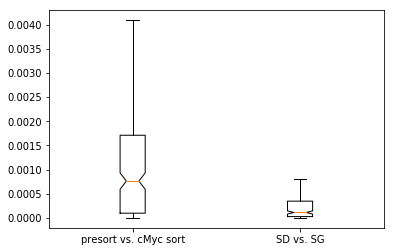

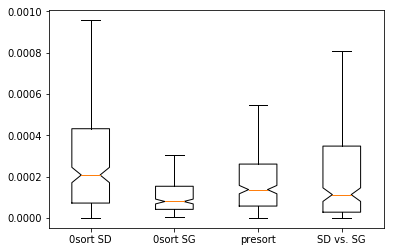

In [99]:
import matplotlib.pyplot as plt
import openpyxl as xl
import os
import numpy as np
import math
%matplotlib inline

def OpenExcel (file_name):
    os.chdir('G:/Promotion/Matlab/Data/NGS_2.Unsorted_libraries')
    wb = xl.load_workbook(file_name,data_only=True, read_only=True)
    ws = wb['Results']
    data = []
    i = 0
    for rowOfCellObjects in ws['C5':'C25']:
        for cellObj in rowOfCellObjects:
            i+= int(cellObj.value)
    for rowOfCellObjects in ws['C5':'BD25']: #'C5':'BD25'
        for cellObj in rowOfCellObjects:
            if int(cellObj.value) > 250:
                data.append(int(cellObj.value)/i)
            else:
                data.append(int(-1))
    return data

def StdFreq (d1, d2, d3):
    freq_std = []
    for i in range(len(d1)):
        a = []
        if d1[i] > -1:
            a.append(d1[i])
        if d2[i] > -1:
            a.append(d2[i])
        if d3[i] > -1:
            a.append(d3[i])
        if len(a) > 1:
            freq_std.append(np.std(a))
    return freq_std


def StdFreq6 (d1, d2, d3, d4, d5, d6):
    matrix1 = Means(d1, d2, d3)
    matrix2 = Means(d4, d5, d6)
    stds = []
    for i in range(len(matrix1)):
        a = []
        if not math.isnan(matrix1[i]):
            a.append(matrix1[i])
        if not math.isnan(matrix2[i]):
            a.append(matrix2[i])
        if len(a) > 1:
            stds.append(np.std(a))
    return stds

def Means (d1, d2, d3):
    matrix = [d1, d2, d3]
    means = []
    for i in range(len(matrix[0])):
        a = []
        for j in range(len(matrix)):
            if matrix[j][i] > -1:
                a.append(matrix[j][i])
        means.append(np.mean(a))
    return means


d1 = OpenExcel('P1 results.xlsx')
d2 = OpenExcel('P2 results.xlsx')
d3 = OpenExcel('P3 results.xlsx')

d4 = OpenExcel('P4 results.xlsx')
d5 = OpenExcel('P5 results.xlsx')
d6 = OpenExcel('P6 results.xlsx')

d7 = OpenExcel('P7 results.xlsx')
d8 = OpenExcel('P8 results.xlsx')
d9 = OpenExcel('P9 results.xlsx')

freq_std_0sort_SD = StdFreq(d1,d2,d3)
freq_std_0sort_SG = StdFreq(d4,d5,d6)
freq_std_presorted = StdFreq(d7,d8,d9)

freq_std_0sort_presort_cMyc = StdFreq6(d1,d2,d3,d7,d8,d9)
freq_std_0sort_SD_SG = StdFreq6(d1,d2,d3,d4,d5,d6)

data = [freq_std_0sort_presort_cMyc, freq_std_0sort_SD_SG]

plt.boxplot(data, notch=True, showfliers=False, labels=['presort vs. cMyc sort','SD vs. SG'] )

#plt.boxplot(freq_std_0sort_SD_SG, notch=True, showfliers=False, labels=['SD vs. SG'] )
plt.figure()
data2 = [freq_std_0sort_SD, freq_std_0sort_SG, freq_std_presorted, freq_std_0sort_SD_SG]
plt.boxplot(data2, notch=True, showfliers=False, labels=['0sort SD','0sort SG','presort', 'SD vs. SG'] )

plt.show()
#plt.savefig('10.png', bbox_inches='tight')

In [54]:
a1 = [1, 2, 4]
a2 = [3, 6, 12]
a = [a1,a2]
for j in range(len(a[0])):
    for i in range(len(a)):
        print(a[i][j])
print(len(a[1]))

1
3
2
6
4
12
3
